Enseñamos la ganancia de la estructura de opciones:

[-3820000.         -3452653.06122449 -3085306.12244898 -2717959.18367347
 -2350612.24489796 -1983265.30612245 -1615918.36734694 -1248571.42857143
  -881224.48979592  -513877.55102041  -146530.6122449    200408.16326531
   384081.63265306   567755.10204082   680000.           680000.
   680000.           557551.02040816   373877.55102041   190204.08163265
   180000.           180000.           180000.           180000.
   180000.           180000.           180000.           180000.
   322857.14285714   506530.6122449    680000.           680000.
   680000.           618775.51020408   435102.04081633   251428.57142857
   -44489.79591837  -411836.73469388  -779183.67346939 -1146530.6122449
 -1513877.55102041 -1881224.48979592 -2248571.42857143 -2615918.36734694
 -2983265.30612245 -3350612.24489796 -3717959.18367347 -4085306.12244898
 -4452653.06122449 -4820000.        ]




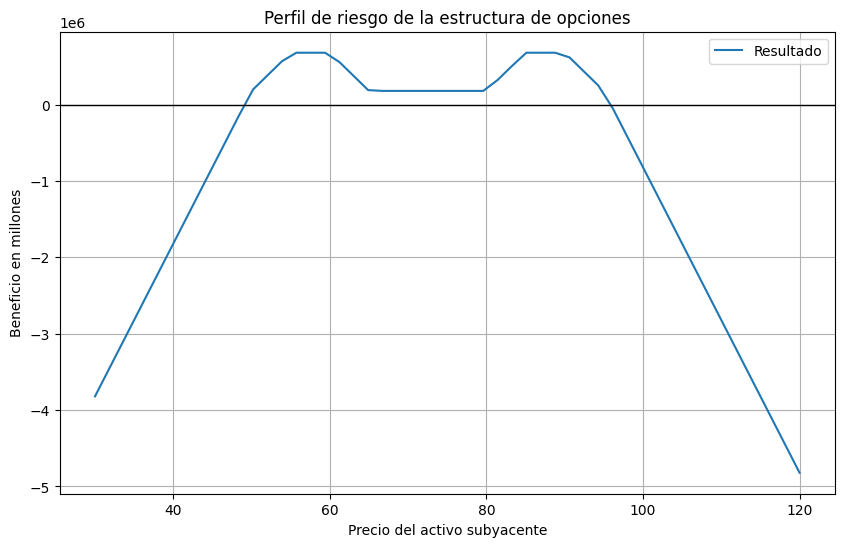

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def put(K, prima, final_price, sentido, cantidad):
    """
    K: strike price
    prima: premium charged to buy/sell the option
    final_price: final price of the underlying asset
    sentido: If we BUY or SELL the option
    cantidad: Quantity, the nmber of lots/batches
    ---------------------------------------------
    return -> The payoff with respect of the final price of the underlying asset
    """
    payoff = np.where(sentido.lower() == "sell", np.minimum(0, final_price-K ) + prima, np.maximum(0, K-final_price) - prima)
    return payoff * cantidad

def call(K, prima, final_price, sentido, cantidad):
    payoff = np.where(sentido.lower() == "sell", np.minimum(0, K-final_price) + prima, np.maximum(0, final_price-K) - prima)
    return payoff * cantidad

def estructura_payoff(final_price_range, options):
    """
    final_price_range: Range of possible values for the underlying asset at any time
    options: list of lists where each list inside has the info defined in the function put and call
    """
    result = np.zeros_like(final_price_range)
    for option in options:
        total_payoff = np.zeros_like(final_price_range)
        strike_price, premium, quantity, option_type, sentido = option
        if option_type.lower() == 'put' or option_type.lower() == 'p':
            total_payoff += put(strike_price, premium, final_price_range, sentido, quantity)
        elif option_type.lower() == 'call' or option_type.lower() == 'c':
            total_payoff += call(strike_price, premium, final_price_range, sentido, quantity)
        result += total_payoff
    return result

def plot_estructura(final_price_range, estructura_payoff_values):
    """
    final_price_range: Range of possible values for the underlying asset at any time
    estructura_payoff_values: Payoff of the collar
    """
    print("Enseñamos la ganancia de la estructura de opciones:")
    print("")
    print(estructura_payoff_values*1000)
    print("\n")
    plt.figure(figsize=(10, 6))
    plt.plot(final_price_range, estructura_payoff_values*1000, label='Resultado')
    plt.axhline(0, color='black', linestyle='-', linewidth=1)
    plt.title('Perfil de riesgo de la estructura de opciones')
    plt.xlabel('Precio del activo subyacente')
    plt.ylabel('Beneficio en millones')
    plt.legend()
    plt.grid(True)
    plt.show()

final_price_range = np.linspace(30, 120)

options = [
    [55, 1.64, 100, 'put', 'SELL'],
    [80, 2.79, 100, 'call', 'BUY'],
    [95, 0.68, 100, 'call', 'SELL'],
    [90, 1.09, 100, 'call', 'SELL'],
    [85, 1.72, 100, 'call', 'SELL'],
    [65, 4.16, 100, 'put', 'BUY'],
    [60, 2.6, 100, 'put', 'SELL'],
    [50, 1.02, 100, 'put', 'SELL']
]

estructura_payoff_values = estructura_payoff(final_price_range, options)

plot_estructura(final_price_range, estructura_payoff_values)